In [1]:
from Utils import *

import re

# data_root = './Anonymized_644.Updated_cleaned_v1.3.2.tsv'
data_root = './anonymized_644.csv'
adjacency_file = './connectivity_646.csv'
cluster_root = 'ln_Data_and_clusters.csv'
validation_file = 'validation_data.xlsx'

In [4]:
pd.read_excel(validation_file).columns

Index(['Dummy ID', 'Age at Diagnosis (Calculated)', 'Pathological Grade',
       'Gender', 'Race', 'Therapeutic combination', 'Tm Laterality (R/L)',
       'Tumor subsite (BOT/Tonsil/Soft Palate/Pharyngeal wall/GPS/NOS)',
       'Affected Lymph node', 'HPV/P16 status', 'T-category', 'N-category',
       'N-category 7th edition', 'N-category 8th edition', 'AJCC stage',
       'AJCC stage 8th edition', 'Neck Disssection after IMRT (Y/N)',
       'Neck Dissection after IMRT (Y / levels)',
       'Smoking status at Diagnosis (Never/Former/Current)',
       'Smoking status (Packs/Year)', 'Overall Survival (1=alive, 0=dead)',
       'Local Control (1=no control, 0=primary recurrance)',
       'Regional Control (1=regional/nodal control,0=regional/nodal recurrance)',
       'Locoregional Control(1=Control,0=Failure)',
       'Distant Control (1=no DM, 0=DM)', 'OS (Calculated)',
       'Regional control (Time)', 'Local control (Time)',
       'Locoregional control (Time)', 'FDM (months)', 'Tot

In [5]:
sd = LNDataset(data_root)
sd.data

26 patients removed due to missing nodes


,gender,laterality,subsite,affected_nodes,hpv,T-category,ajcc8,smoking_status,neck_boost,total_dose,FT,Aspiration rate Pre-therapy,Aspiration rate Post-therapy,AS,N-category,TOX,nodes
id,,,,,,,,,,,,,,,,,
1,Male,R,Tonsil,"R2, R3",Positive,T1,II,Current,N,66.00,0,N,N,0,N2b,False,"[R2A, R2B, R3]"
2,Female,R,BOT,R2,Positive,T2,II,Never,Y,66.00,0,N,N,0,N2b,False,"[R2A, R2B]"
3,Female,L,Tonsil,"L2, L3",Positive,T2,II,Never,N,70.00,0,N,N,0,N2b,False,"[L2A, L2B, L3]"
4,Male,R,BOT,R2,Positive,T1,I,Never,N,66.00,0,N,N,0,N1,False,"[R2A, R2B]"
5,Male,R,BOT,R3,Positive,T4,III,Never,N,69.96,0,N,N,0,N2a,False,[R3]
6,Male,R,Tonsil,"R2, R3",Positive,T1,II,Never,N,70.00,0,N,N,0,N2a,False,"[R2A, R2B, R3]"
7,Male,Bilateral,BOT,"R2, L3",Positive,T4,III,Current,N,69.96,1,N,Y,1,N2c,True,"[L3, R2A, R2B]"
8,Female,L,Tonsil,L2,Negative,T1,IV,Formar,Y,66.00,0,N,N,0,N2a,False,"[L2A, L2B]"
9,Male,R,BOT,R2,Positive,T3,III,Never,Y,72.00,0,N,N,0,N3,False,"[R2A, R2B]"


In [6]:
sd.data[sd.data['N-category'] == 'N0']

,gender,laterality,subsite,affected_nodes,hpv,T-category,ajcc8,smoking_status,neck_boost,total_dose,FT,Aspiration rate Pre-therapy,Aspiration rate Post-therapy,AS,N-category,TOX,nodes
id,,,,,,,,,,,,,,,,,
10192,Female,R,Tonsil,"R2, L2",Unknown,T4,NaN,Formar,Y,70.0,1,N,Y,1,N0,True,"[L2A, L2B, R2A, R2B]"
10197,Male,R,NOS,R2,Unknown,T3,NaN,Formar,Y,70.0,0,N,Y,1,N0,True,"[R2A, R2B]"


In [8]:
validation_data = pd.read_excel(validation_file, index_col = 0).rename(columns = {'Affected Lymph node': 'Affected Lymph node UPPER'})
vd = LNDataset(validation_data, validation=True)
vd.data

,Age at Diagnosis (Calculated),Pathological Grade,gender,Race,Therapeutic combination,laterality,subsite,affected_nodes,hpv,T-category,...,neck_boost,Treatment duration (Days),Dose/fraction (Gy),FT,Aspiration rate Pre-therapy,Aspiration rate Post-therapy,AS,Aspiration type,TOX,nodes
id,,,,,,,,,,,,,,,,,,,,,
7000,55.233333,II,Male,White/Caucasian,CC,R,Tonsil,,Positive,T1,...,N,39,2.200000,0,N,N,0,NaN,False,[]
7001,48.961111,III,Male,White/Caucasian,Radiation alone,R,NOS,"R2, R3",Positive,T2,...,Y,37,2.200000,0,N,N,0,NaN,False,"[R2A, R2B, R3]"
7002,56.688889,III,Female,White/Caucasian,Radiation alone,L,Tonsil,,Positive,T2,...,N,39,2.200000,0,U,Y,1,NaN,True,[]
7003,51.983333,IV,Male,Black/African American,Radiation alone,R,NOS,,Positive,T1,...,N,41,2.000000,0,N,N,0,NaN,False,[]
7004,49.683333,II,Male,White/Caucasian,IC+Radiation alone,R,BOT,"R21, R3",Positive,T1,...,Y,38,2.200000,0,N,N,0,NaN,False,[R3]
7005,56.238889,III,Male,White/Caucasian,CC,L,Tonsil,,Positive,T3,...,Y,38,2.000000,0,U,U,0,NaN,False,[]
7006,72.208333,III,Male,White/Caucasian,Radiation alone,L,BOT,"L2, L3",Positive,T1,...,Y,38,2.200000,0,N,N,0,NaN,False,"[L2A, L2B, L3]"
7007,51.377778,II,Male,White/Caucasian,CC,L,Tonsil,"L2, L3",Positive,T2,...,Y,44,2.121212,0,N,N,0,NaN,False,"[L2A, L2B, L3]"
7008,57.919444,III,Female,White/Caucasian,CC,L,Tonsil,,Positive,T3,...,N,44,2.121212,0,N,U,0,NaN,False,[]


In [20]:
vd.data.loc[[7005,7008,7010]]

,Age at Diagnosis (Calculated),Pathological Grade,gender,Race,Therapeutic combination,laterality,subsite,affected_nodes,hpv,T-category,...,neck_boost,Treatment duration (Days),Dose/fraction (Gy),FT,Aspiration rate Pre-therapy,Aspiration rate Post-therapy,AS,Aspiration type,TOX,nodes
id,,,,,,,,,,,,,,,,,,,,,
7005,56.238889,III,Male,White/Caucasian,CC,L,Tonsil,,Positive,T3,...,Y,38,2.000000,0,U,U,0,NaN,False,[]
7008,57.919444,III,Female,White/Caucasian,CC,L,Tonsil,,Positive,T3,...,N,44,2.121212,0,N,U,0,NaN,False,[]
7010,49.586111,III,Male,White/Caucasian,CC,R,BOT,L2b,Positive,T4,...,N,44,2.121212,0,N,Y,1,NaN,True,[L2B]


In [19]:
test = pd.read_excel(validation_file)
test[test['OS (Calculated)'] >45]

,Dummy ID,Age at Diagnosis (Calculated),Pathological Grade,Gender,Race,Therapeutic combination,Tm Laterality (R/L),Tumor subsite (BOT/Tonsil/Soft Palate/Pharyngeal wall/GPS/NOS),Affected Lymph node,HPV/P16 status,...,Total dose,Total fractions,Neck boost (Y/N),Treatment duration (Days),Dose/fraction (Gy),Feeding tube 6m,Aspiration rate Pre-therapy,Aspiration rate Post-therapy,Aspiration rate(Y/N),Aspiration type
2,7062,63.766667,II,Male,White/Caucasian,CC,R,BOT,NaN,Positive,...,70,39,Y,37,1.794872,N,N,N,N,NaN
3,7457,78.702778,III,Male,White/Caucasian,CC,Bilateral,BOT,"R2, L2, R3, L3",Positive,...,70,33,N,44,2.121212,N,N,N,N,NaN
4,7198,60.008333,II,Male,White/Caucasian,IC+CC,R,BOT,"R2, R3",Positive,...,70,33,Y,45,2.121212,N,N,N,N,NaN
5,7429,68.936111,NaN,Male,White/Caucasian,IC+CC,L,Tonsil,"L2, L5",Positive,...,70,33,Y,45,2.121212,U,N,N,N,NaN
6,7352,56.608333,III,Female,Black/African American,IC+CC,R,BOT,"R2, L2, R2, R3",Positive,...,70,33,Y,44,2.121212,N,N,N,N,NaN
7,7140,49.619444,II,Male,White/Caucasian,IC+Radiation alone,R,NOS,"R2, R3",Positive,...,66,30,Y,39,2.200000,N,N,N,N,NaN
9,7472,54.394444,III,Male,White/Caucasian,Radiation alone,R,Tonsil,R2,Positive,...,66,33,N,42,2.000000,N,U,U,U,NaN
10,7491,49.688889,III,Male,White/Caucasian,CC,R,Tonsil,"R2, L2",Positive,...,70,35,N,39,2.000000,N,N,N,N,NaN
11,7224,60.552778,II,Male,White/Caucasian,CC,R,NOS,"R2, R3",Positive,...,60,30,Y,38,2.000000,Y,N,Y,Y,Thin liquid
12,7342,73.236111,NaN,Male,White/Caucasian,CC,R,BOT,"R2, R3",Positive,...,70,33,Y,43,2.121212,N,N,N,N,NaN


In [5]:
def pattern_names(monograms):
    d = monograms.copy()
    col_names = list(monograms.columns.astype(str))
    def getnames(value_array):
        string = ''
        for v,name in zip(value_array, col_names):
            if v == 0:
                continue
            if v == 1:
                string += '1x' + name + '_'
            elif v == 2:
                string += '2x' + name + '_'
        return string[:-1]
    return d.apply(lambda x: getnames(x.values),axis=1)


def add_outcomes(dm, sd, nodes = True):
    if nodes:
        dm.loc[:, 'pattern'] = pattern_names(sd.dual_monograms)
        dm.loc[:, 'nodes'] = sd.data.nodes.copy()
    dm.index.name = 'id'
    dm = sd.data.loc[:, ['FT','AS','TOX']].merge(dm, on='id')
    return dm
    
def pattern_summary(sd):
    dm = sd.dual_monograms.copy()
    dm = add_outcomes(dm, sd)
    
    pattern_list = list(dm.groupby('pattern').size().sort_values(ascending=False).index[:])
    print(len(pattern_list),'patterns\n')
    total_ft = dm.loc[:,'FT'].sum()
    total_as = dm.loc[:,'AS'].sum()
    def pattern_details(subset):
        print('count',subset.shape[0])
        subset.loc[:,'FT_percent'] = subset.loc[:,'FT'].values/subset.shape[0] #percent of total toxicity from given pattern
        subset.loc[:,'AS_percent'] = subset.loc[:,'AS'].values/subset.shape[0]
        subset.loc[:,'TOX_percent'] = subset.loc[:,'TOX'].values/subset.shape[0]
        print(subset.loc[:,['FT','FT_percent','AS','AS_percent','TOX','TOX_percent']].sum())
        print()

    for pattern in pattern_list:
        print('pattern',pattern)
        pattern_details(dm[dm.pattern == pattern])

    print('all_top6')
    pattern_details(dm[dm.pattern.isin(pattern_list[0:6])])
    
    print('other')
    pattern_details(dm[~dm.pattern.isin(pattern_list[0:6])])
    
    print('total')
    pattern_details(dm)
    
pattern_summary(sd)

63 patterns

pattern 1x2A_1x2B
count 227
FT             24.000000
FT_percent      0.105727
AS             26.000000
AS_percent      0.114537
TOX            43.000000
TOX_percent     0.189427
dtype: float64

pattern 1x2A_1x2B_1x3
count 125
FT             16.000
FT_percent      0.128
AS             13.000
AS_percent      0.104
TOX            22.000
TOX_percent     0.176
dtype: float64

pattern 2x2A_2x2B
count 37
FT             10.000000
FT_percent      0.270270
AS              4.000000
AS_percent      0.108108
TOX            11.000000
TOX_percent     0.297297
dtype: float64

pattern 1x2A_1x2B_1x3_1x4
count 28
FT              9.000000
FT_percent      0.321429
AS              7.000000
AS_percent      0.250000
TOX            10.000000
TOX_percent     0.357143
dtype: float64

pattern 2x2A_2x2B_1x3
count 19
FT             6.000000
FT_percent     0.315789
AS             4.000000
AS_percent     0.210526
TOX            7.000000
TOX_percent    0.368421
dtype: float64

pattern 2x2A_2x2B_2x3
count 

/home/evl/andrew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/evl/andrew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


FT             0.0
FT_percent     0.0
AS             0.0
AS_percent     0.0
TOX            0.0
TOX_percent    0.0
dtype: float64

pattern 1x3_1xRPLN
count 1
FT             0.0
FT_percent     0.0
AS             0.0
AS_percent     0.0
TOX            0.0
TOX_percent    0.0
dtype: float64

pattern 1x2A_1x2B_2x3_2x4_1x5B
count 1
FT             1.0
FT_percent     1.0
AS             0.0
AS_percent     0.0
TOX            1.0
TOX_percent    1.0
dtype: float64

pattern 1x2A_1x2B_2x3_2x4
count 1
FT             0.0
FT_percent     0.0
AS             0.0
AS_percent     0.0
TOX            0.0
TOX_percent    0.0
dtype: float64

pattern 1x2A_1x2B_2x3_1x4
count 1
FT             0.0
FT_percent     0.0
AS             0.0
AS_percent     0.0
TOX            0.0
TOX_percent    0.0
dtype: float64

pattern 2x2A_2x2B_2x3_2x4_2x5B_1xRPLN
count 1
FT             1.0
FT_percent     1.0
AS             1.0
AS_percent     1.0
TOX            1.0
TOX_percent    1.0
dtype: float64

pattern 1x2A_1x2B_1x5A_1xRPLN
count 1
FT

In [6]:
def get_pattern_clusters(vectors, k=4, normalize = True, square_dist = True):
#     vectors.loc[:,'bilateral'] = vectors.bilateral.values/2
    if normalize:
        vectors = vectors.loc[:, vectors.std() > 0]
        vectors = (vectors - vectors.mean())/vectors.std()
    patterns = np.unique(vectors.values,axis=0)
    clusterer = AClusterer(k, dist_func = canberra, link = 'ward', square_dist = square_dist)
    temp_clusters = clusterer.fit_predict(patterns)
    mapped_clusters = np.zeros((vectors.shape[0],))
    for p,c in zip(patterns, temp_clusters):
        for v in range(vectors.shape[0]):
            if np.array_equal(vectors.values[v],p):
                mapped_clusters[v] = c
    return pd.DataFrame(mapped_clusters.astype('int32'), index = vectors.index, columns =['cluster'])

k = 4
print( get_cluster_correlations( sd, get_pattern_clusters( sd.bigrams(),k=4 ).values.ravel() ) )
get_cluster_percentages(sd, get_pattern_clusters(sd.bigrams(), k=4))

    fisher_exact      chi2   LgCvAUC
FT      0.000048  0.000035  0.604870
AS      0.000010  0.000003  0.616195


,Total Count,FT count,%FT,AS count,%AS
1,29.0,8.0,27.6,13.0,44.8
2,84.0,24.0,28.6,20.0,23.8
3,23.0,9.0,39.1,7.0,30.4
4,446.0,58.0,13.0,56.0,12.6


In [7]:
def load_clusters():
    ln_cluster_df_cols = ['lncanberraward4']
    ln_clusters_df = pd.read_csv(cluster_root,index_col = 'id').loc[:,ln_cluster_df_cols]
    ln_clusters_df = add_outcomes(ln_clusters_df, sd) 
    ln_clusters_df = ln_clusters_df.merge(sd.dual_monograms.copy(), on='id')
    
    #swap clusters 1 and 2 to make consistent with increasing risk. hardcoded for now as long as using lncanberraward4
    lowest_risk = (ln_clusters_df['lncanberraward4'] == 2)
    current_c1 = (ln_clusters_df['lncanberraward4'] == 1)
    
    ln_clusters_df.loc[lowest_risk, 'lncanberraward4'] = 1
    ln_clusters_df.loc[current_c1, 'lncanberraward4'] = 2
    return ln_clusters_df
ln_clusters_df = load_clusters()

In [29]:
test = sd.data.copy()


Index(['gender', 'laterality', 'subsite', 'affected_nodes', 'hpv',
       'T-category', 'ajcc8', 'smoking_status', 'neck_boost', 'total_dose',
       'FT', 'Aspiration rate Pre-therapy', 'Aspiration rate Post-therapy',
       'AS', 'N-category', 'TOX', 'nodes'],
      dtype='object')

In [24]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import adjusted_rand_score
def encode_unique(x):
    x_strings = np.apply_along_axis(lambda k: ''.join(list(k.astype('str'))), 1, x)
    unique = list(np.unique(x_strings, axis = 0))
    encode_dict = {u: k for k,u in enumerate(unique)}
    x_encoded = np.array([encode_dict[k] for k in x_strings])
    return x_encoded.astype('int')


def fisher_correlation(x, y, maxclasses = 4):
    if isinstance(x, pd.DataFrame):
        x = x.values
    if isinstance(y, pd.DataFrame):
        y = y.values
    x_unique = encode_unique(x)
    
    try:
        if x_unique.max() > maxclasses:
            return chi2_contingency(get_contingency_table(x_unique, y))[1]
        return fisher_exact_test(x_unique.reshape(-1,1),y.reshape(-1,1))  
    except:
        try:
            return chi2_contingency(get_contingency_table(x_unique, y))[1]
        except:
            return -1
    
def AUC(model, x, y):
    model.fit(x,y)
    ypred= model.predict_proba(x)[:,1]
    return roc_auc_score(y, ypred)

def cvAUC(model, x, y):
    probs = loo_cross_val_proba(model, x, y, None)
    auc_score = roc_auc_score(y, probs)
    return auc_score

def loo_cross_val_proba(classifier, x ,y, transformer = QuantileTransformer(n_quantiles = 190)):
    #cross val predict from sklearn doesn't work?
    if isinstance(x, pd.DataFrame):
        x = x.values
    if isinstance(y, pd.DataFrame):
        y = y.values
    arg_range = np.arange(x.shape[0])
    y_pred = np.zeros((y.shape[0],))
    for idx in arg_range:
        xtrain = np.delete(x, idx, 0)
        ytrain = np.delete(y, idx, 0)
        xtest = x[idx].reshape(1,-1)
        if transformer is not None:
            xtrain = transformer.fit_transform(xtrain)
            xtest = transformer.transform(xtest)
        classifier.fit(xtrain, ytrain.ravel())
        y_pred[idx] = classifier.predict_proba(xtest)[0,1]
    return y_pred

def evaluate_features(features, to_df = True):
    outcomes = add_outcomes(pd.DataFrame(index=features.index), sd, nodes = False)
    model = lg()
    result_dict = {}
    for outcome_name in outcomes.columns:
        target = outcomes[outcome_name].values.ravel()
        results = {}
#         results['cvAUC'] = cvAUC(model, features, target)
        results['stratAUC'] = stratified_lg_AUC(model, features, target)
#         results['AUC'] = AUC(model, features, target)
        results['p-val'] = fisher_correlation(features, target)
    
        discrete_features = encode_unique(features).reshape(-1,1)
        results['info'] = mutual_info_classif(discrete_features, target, discrete_features = True)[0]
        results['rand'] = adjusted_rand_score(target.ravel(), discrete_features.ravel())
        result_dict[outcome_name] = results
    if to_df:
        return pd.DataFrame(result_dict)
    return result_dict

def evaluate_clusters(clusters, cluster_name = None):
    if len(np.unique(clusters.astype('str'))) > 1:
        cluster_dummies = pd.get_dummies(clusters.astype('str'), drop_first = True)
    else:
        cluster_dummies = clusters
    result_df = evaluate_features(cluster_dummies)
    if cluster_name is not None:
        result_df.index.name = 'metric'
        result_df.loc[:,'clustering'] = cluster_name
    return result_df

def eval_and_compare_clusters(feature_dict):
    results = []
    for feature_name, features in feature_dict.items():
        res_df = evaluate_clusters(features, feature_name)
        print(res_df.loc['p-val',:])
        print()
        results.append(res_df)
    results = pd.concat(results).reset_index().set_index(['metric','clustering'])
    return results

def stratified_lg_AUC(model, x, y):
    if isinstance(x, pd.DataFrame):
        x = x.values
    if isinstance(y, pd.DataFrame):
        y = y.values.ravel()
    if x.ndim == 1:
        x = x.reshape(-1,1)
    cv = StratifiedKFold(n_splits = 10)
    aucs = []
    for i, (train, test) in enumerate(cv.split(x,y)):
        model.fit(x[train],y[train])
        y_pred = model.predict_proba(x[test])[:,1]
        aucs.append(roc_auc_score(y[test],y_pred))
    return np.mean(aucs)

def test_clusters(sd, use_tstage = True, use_nstage = True):
    t_stage = pd.get_dummies( sd.data['T-category'],drop_first = True)
    n_stage = pd.get_dummies( sd.data['N-category'],drop_first = True)
    k_clust = lambda x,k: get_pattern_clusters(x, k=k,normalize=True,square_dist=True).astype('str')
    n_clust = 4
    cluster_dict = {
#         'partial'+str(n_clust): k_clust(sd.bigrams(partial_points = True), n_clust),
        'lateral'+str(n_clust + 1): k_clust(sd.bigrams(), n_clust+1),
        'lateral'+str(n_clust): k_clust(sd.bigrams(), n_clust),
        'lateral'+str(n_clust-1): k_clust(sd.bigrams(), n_clust-1),
        'lateral'+str(n_clust-2): k_clust(sd.bigrams(), n_clust-2),
#         'pl'+str(n_clust): k_clust(sd.bigrams(), n_clust),
#         'sl'+str(n_clust): k_clust(sd.bigrams(), n_clust),
        'lncanberraward4': load_clusters().loc[:,'lncanberraward4']
    }
    #hpv(keep to 3) smoking(former/current vs never) age(<=65) t-stage(1/2 vs 3/4) (w/wo chemo)
    merge_t = lambda d: t_stage.copy().merge(d, on = 'id')
    merge_n = lambda d: n_stage.copy().merge(d, on = 'id')
    feature_dict = {}
    for k,v in cluster_dict.items():
        feature_dict[k] = v
        if use_nstage:
            feature_dict['nstage_' + k] = merge_n(v)
        if use_tstage:
            feature_dict['tstage_' + k] = merge_t(v)
    del cluster_dict
    
    if use_tstage:
        feature_dict['t-stage'] = t_stage
    if use_nstage:
        feature_dict['n-stage'] = n_stage
    return eval_and_compare_clusters(feature_dict)

cluster_results = test_clusters(sd)
cluster_results.loc['stratAUC']

FT            2.54106e-05
AS            4.23282e-06
TOX           2.08786e-07
clustering       lateral5
Name: p-val, dtype: object

FT                 0.00118322
AS                6.14688e-08
TOX               1.18032e-06
clustering    nstage_lateral5
Name: p-val, dtype: object

FT                 5.5716e-13
AS                4.59713e-12
TOX               1.82969e-18
clustering    tstage_lateral5
Name: p-val, dtype: object

FT            1.95445e-05
AS            3.84084e-06
TOX           1.06216e-07
clustering       lateral4
Name: p-val, dtype: object

FT                0.000265784
AS                  2.983e-08
TOX               1.54445e-07
clustering    nstage_lateral4
Name: p-val, dtype: object

FT                3.19468e-13
AS                3.06592e-12
TOX               3.42899e-19
clustering    tstage_lateral4
Name: p-val, dtype: object

FT             9.3452e-06
AS            2.03482e-05
TOX            1.0032e-07
clustering       lateral3
Name: p-val, dtype: object

FT          

,FT,AS,TOX
clustering,,,
lateral5,0.597044,0.620067,0.614801
nstage_lateral5,0.577810,0.668754,0.651972
tstage_lateral5,0.716937,0.744740,0.756017
lateral4,0.594960,0.620937,0.618832
nstage_lateral4,0.566769,0.676845,0.655693
tstage_lateral4,0.718603,0.748160,0.758343
lateral3,0.612131,0.602764,0.615552
nstage_lateral3,0.591962,0.675051,0.654898
tstage_lateral3,0.733931,0.740419,0.752529


(0.044417403628117906, 0.8341773255813953)

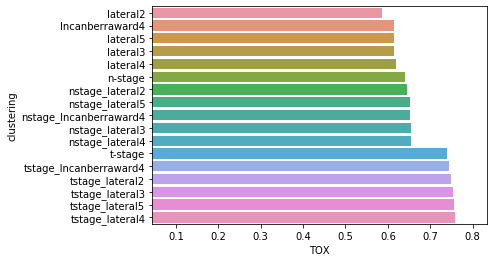

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
measure = 'stratAUC'
sns.barplot(
    data = cluster_results.loc[measure].reset_index(),
    x='TOX',
    y='clustering',
    orient = 'h',
    order = cluster_results.loc[measure].groupby('clustering').agg('mean').sort_values('TOX').index
)
plt.xlim([cluster_results.loc[measure].values.ravel().min()*.08, cluster_results.loc[measure].values.ravel().max()*1.1])

In [10]:
def finalized_sorted_clusters(sd):
    clusters = get_pattern_clusters(sd.bigrams())
    clusters = add_outcomes(clusters, sd, nodes=False)
    tox_percent = {}
    for clust,d in clusters.groupby('cluster'):
        tox_percent[clust] = d.loc[:,'TOX'].sum()/d.shape[0]
    clusters['TOX_percent'] = clusters['cluster'].apply(lambda x: tox_percent[x])
    clusters = clusters.sort_values('TOX_percent',axis=0,ascending=True)
    c_num = 1
    c_dict = {}
    for clust,d in clusters.groupby('TOX_percent'):
        old_cluster = d['cluster'].mean().astype('int')
        c_dict[old_cluster] = c_num
        c_num += 1
    return pd.DataFrame(clusters['cluster'].apply(lambda x: c_dict[x]))
finalized_sorted_clusters(sd).T

id,1,5064,5063,5062,5059,5057,5056,5055,5053,5050,...,10128,5065,186,33,5020,10171,10172,198,5112,5081
cluster,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


In [23]:
def format_cluster_df(clusters, sd, categories, td_threshold = 70):
    df = sd.data.loc[:,categories]
    df = df.merge(clusters, on = 'id')
    df['total_dose'] = df['total_dose'] >= td_threshold
    df['laterality'] = (df['laterality'] == 'Bilateral').astype('int')
    return df

def complete_cluster_correlations(clusters, sd):
    categories = ['FT','AS','TOX','T-category','N-category','ajcc8','neck_boost','subsite','laterality','hpv','total_dose','smoking_status']
    df = format_cluster_df(clusters, sd, categories)
    #remove later
#     df.loc[df[(df.subsite != 'BOT') & (df.subsite != 'Tonsil')].index,'subsite'] = 'Other'
    unique_clusters = np.unique(clusters.values)
    var_dict = {}
    for cat in categories:
        row = {}
        clean_df = df.loc[df[cat].notna()].loc[:,['cluster',cat]]
        x = clean_df.cluster.values.reshape(-1,1)
        y = clean_df[cat].values.reshape(-1,1)
        p_val = fisher_correlation(x,y,2)
        
        unique_groups = np.unique(clean_df[cat].values)
        for group, subset in clean_df.groupby(cat):
            if group == 0:
                continue
            rowname = str(cat) + '_' + str(group)
            row = {}
            for c in unique_clusters:
                subset_clusters = subset[subset.cluster == c]
                row['clust'+str(c)+'_cnt'] = subset_clusters.shape[0]
#                 row['clust'+str(c)+'_pcnt'] = 100*np.round(subset_clusters.shape[0]/clean_df[clean_df.cluster == c].shape[0],3)
            row['p'] = np.round(p_val,5)
            var_dict[rowname] = row
    return pd.DataFrame(var_dict).T
#     for c,d in df.groupby('cluster'):
#         print('cluster', c)
            
        
complete_cluster_correlations(finalized_sorted_clusters(sd), sd)

,clust1_cnt,clust2_cnt,clust3_cnt,clust4_cnt,p
FT_1,58.0,24.0,9.0,8.0,0.00005
AS_1,56.0,20.0,7.0,13.0,0.00000
TOX_True,91.0,33.0,12.0,16.0,0.00000
T-category_T1,122.0,5.0,2.0,2.0,0.00000
T-category_T2,195.0,35.0,6.0,9.0,0.00000
T-category_T3,83.0,23.0,8.0,7.0,0.00000
T-category_T4,46.0,21.0,7.0,11.0,0.00000
N-category_N0,1.0,1.0,0.0,0.0,0.00000
N-category_N1,69.0,0.0,0.0,1.0,0.00000
N-category_N2a,49.0,0.0,0.0,0.0,0.00000


In [26]:
def print_cluster_summaries(clusters, sd):
    cluster_df = add_outcomes(clusters, sd).merge(sd.dual_monograms, on='id').merge(sd.spread,on='id')
    for g,d in cluster_df.groupby('cluster'):
        print('cluster', g, 'count', d.shape[0])
        print(len(np.unique(d.pattern.values)),'patterns')
        print(pd.concat([d.loc[:,['AS','FT','TOX']].sum(),d.loc[:,['AS','FT','TOX']].mean()],axis=1))
        node_names = ['1A','1B','2A','2B','3','4','5A','5B', 'RPLN'] #is is always gone
        unilateral = (d.loc[:,node_names] == 1).astype('int')
        bilateral = (d.loc[:,node_names]  > 1).astype('int')
        either = (d.loc[:,node_names]  > 0).astype('int')
        spread = d.loc[:,['ips_spread','contra_spread']]
        print(pd.concat([unilateral.mean(),bilateral.mean(),either.mean(),spread.mean()],axis=1))
        print()
print_cluster_summaries(finalized_sorted_clusters(sd), sd)

cluster 1 count 446
22 patterns
        0         1
AS   56.0  0.125561
FT   58.0  0.130045
TOX  91.0  0.204036
                      0         1         2         3
1A             0.004484  0.000000  0.004484       NaN
1B             0.029148  0.000000  0.029148       NaN
2A             0.946188  0.000000  0.946188       NaN
2B             0.946188  0.000000  0.946188       NaN
3              0.410314  0.000000  0.410314       NaN
4              0.078475  0.002242  0.080717       NaN
5A             0.008969  0.000000  0.008969       NaN
5B             0.004484  0.000000  0.004484       NaN
RPLN           0.076233  0.000000  0.076233       NaN
ips_spread          NaN       NaN       NaN  0.571300
contra_spread       NaN       NaN       NaN  0.077728

cluster 2 count 84
17 patterns
        0         1
AS   20.0  0.238095
FT   24.0  0.285714
TOX  33.0  0.392857
                      0         1         2         3
1A             0.000000  0.000000  0.000000       NaN
1B             0.083

In [27]:
from matplotlib.colors import to_hex

def red_hex(val, scale = 1):
    return to_hex(plt.get_cmap('Reds')(val**scale))

def cluster_colors(clusters, sd, scale = .5):
    cluster_df = add_outcomes(clusters, sd).merge(sd.dual_monograms, on='id').merge(sd.spread,on='id')
    cluster_df = cluster_df.merge(sd.dual_bigrams, on='id')
    map_list = {}
    for g,d in cluster_df.groupby('cluster'):
        node_names = ['1A','1B','2A','2B','3','4','5A','5B', 'RPLN'] + list(sd.dual_bigrams.columns) #is is always gone
        unilateral = (d.loc[:,node_names] >= 1).astype('int')
        bilateral = (d.loc[:,node_names]  > 1).astype('int')
        df = pd.concat([unilateral.mean(),bilateral.mean()],axis=1)
        map_list[g] =df.applymap(lambda x: red_hex(x, scale))
        
    return map_list
cluster_colors(finalized_sorted_clusters(sd), sd)

{1:             0        1
 1A    #feeae0  #fff5f0
 1B    #fdd3c1  #fff5f0
 2A    #73030f  #fff5f0
 2B    #73030f  #fff5f0
 3     #eb372a  #fff5f0
 4     #fcb095  #ffede5
 5A    #fee5d9  #fff5f0
 5B    #feeae0  #fff5f0
 RPLN  #fcb398  #fff5f0
 1A1B  #fdd1be  #ffede5
 1A6   #feeae0  #fff5f0
 1B2A  #73030f  #fdd7c6
 1B3   #e43027  #fff5f0
 2A2B  #73030f  #73030f
 2A3   #6b010e  #f0402f
 2B5A  #73030f  #fee8dd
 34    #ea362a  #fcb296
 35A   #e93529  #fff5f0
 36    #eb372a  #fff5f0
 45B   #fcae92  #ffede5
 46    #fcb095  #ffede5
 5A5B  #fee3d7  #ffede5,
 2:             0        1
 1A    #fff5f0  #fff5f0
 1B    #fca285  #fed8c7
 2A    #67000d  #67000d
 2B    #67000d  #67000d
 3     #e93529  #fff5f0
 4     #fca78b  #fff5f0
 5A    #fed8c7  #fee3d7
 5B    #fed8c7  #fff5f0
 RPLN  #fc9777  #fff5f0
 1A1B  #fca285  #fed8c7
 1A6   #fff5f0  #fff5f0
 1B2A  #67000d  #67000d
 1B3   #de2b25  #fcb69b
 2A2B  #67000d  #67000d
 2A3   #67000d  #67000d
 2B5A  #67000d  #67000d
 34    #e43027  #fcb69b
 35A   #e

0.9914089347079038


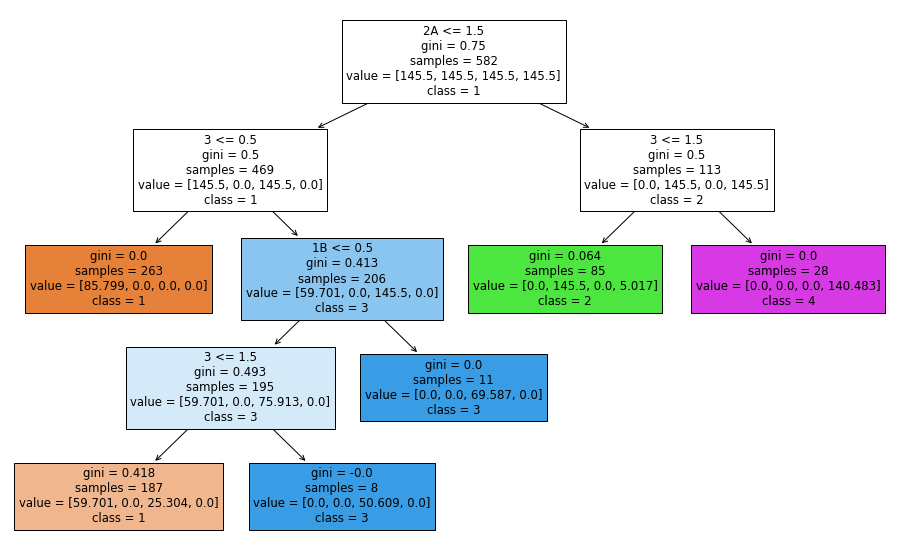

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)

# rough code testing tree prediction
# ft = ln_clusters_df.loc[:,['FT']].values
# aspiration = ln_clusters_df.loc[:,['AS']].values
# spatial = pd.get_dummies(ln_clusters_df.loc[:,['1A','1B','2A','2B','3','4','5A','5B','RPLN']], drop_first=True)
# def tree_cv(x,y,scoring='roc_auc'):
#     tree = DecisionTreeClassifier(max_depth = 5, class_weight='balanced')
#     return cross_val_score(tree, x, y, cv=30, scoring = scoring).mean()
# print(tree_cv(spatial,ft))
# print(tree_cv(spatial,aspiration))

# print(tree_cv(pd.get_dummies(ln_clusters_df['lncanberraward4'],drop_first=True),ft))
# print(tree_cv(pd.get_dummies(ln_clusters_df['lncanberraward4'],drop_first=True),aspiration))

def print_decision_tree_rules(x,clusters):
    x = x.sort_index()
    clusters = clusters.sort_index()
    tree = DecisionTreeClassifier(max_leaf_nodes = 6, class_weight='balanced').fit(x, clusters)
    print(tree.score(x, clusters))
    plot_tree(tree, feature_names = list(x.columns), class_names = ['1','2','3','4'],filled=True)
          
print_decision_tree_rules(sd.dual_monograms.copy(), finalized_sorted_clusters(sd) )

/home/evl/andrew/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,FT,RAD,AS,cluster,T1-T2,T3-T4,N0-N1,N2a-N2b,N2c-N3
id,,,,,,,,,
1,0,False,0,1,True,False,False,True,False
2,0,False,0,1,True,False,False,True,False
3,0,False,0,1,True,False,False,True,False
4,0,False,0,1,True,False,True,False,False
5,0,False,0,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
10199,0,False,0,1,False,True,True,False,False
10202,0,False,0,1,False,True,False,True,False
10203,0,True,1,1,True,False,False,False,True


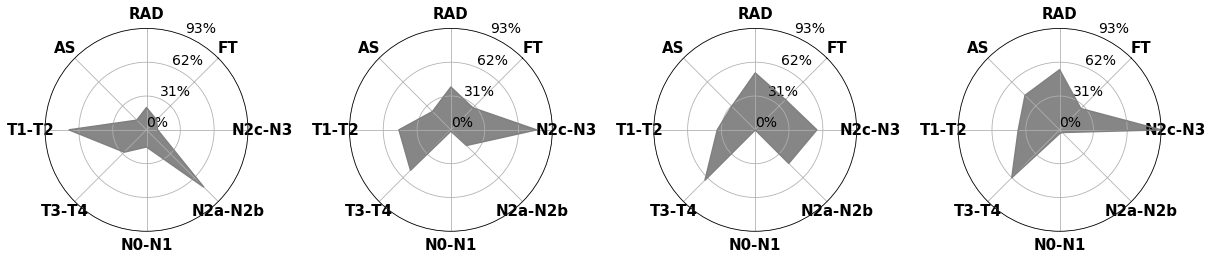

In [47]:
def radar_outcomes(sd):
    discrete = lambda col, x: sd.data.loc[:,col] == x
    def combine(col, varlist):
        discretelist = [discrete(col,x) for x in varlist]
        output = discretelist[0]
        for series in discretelist:
            output = (output + series) > 0
        return output
    cm = finalized_sorted_clusters(sd)
#     cm['T1'] = sd.data.loc[:,'T-category'] == 'T1'
#     cm['T4'] = sd.data.loc[:,'T-category'] == 'T4'
    cm['T1-T2'] = combine('T-category',['T1','T2'])
    cm['T3-T4'] = combine('T-category',['T3','T4'])
    cm['N0-N1'] = combine('N-category',['N0','N1'])
    cm['N2a-N2b'] = combine('N-category', ['N2a','N2b'])
    cm['N2c-N3'] = combine('N-category',['N2c','N3'])
#     cm['AJCC8 4'] = sd.data.loc[:,'ajcc8'] == 'IV'
#     cm['N1'] = sd.data.loc[:,'N-category'] == 'N1'
#     cm['N2a'] = sd.data.loc[:,'N-category'] == 'N2a'
#     cm['N2b'] = sd.data.loc[:,'N-category'] == 'N2b'
#     cm['N2c'] = sd.data.loc[:,'N-category'] == 'N2c'
#     cm['N3'] = sd.data.loc[:,'N-category'] == 'N3'
#     cm['N2c/3'] = (sd.data.loc[:,'N-category'] == 'N3') + (sd.data.loc[:,'N-category'] == 'N2c') > 0
#     cm['70gy'] = sd.data.loc[:,'total_dose'] >= 70
    cm = add_outcomes(cm, sd, False)
    cm = cm.rename(columns = {'TOX':"RAD"})
    cm = cm[ ['FT','RAD','AS'] + [col for col in cm.columns if col not in ['RAD','AS','FT']]]
    new_outcomes = list(cm.drop('cluster',axis=1).columns) 
    return cm,new_outcomes
    
def outcome_radar(sd, 
                  figname = None,
                  colors = ['#1f78b4','#b2df8a','#a6cee3','#33a02c'], 
                  n_ticks = 4,
                 y_transform = None): 
    data, xlabels = radar_outcomes(sd)
    if y_transform is None:
        y_transform = lambda x: x
    num_levels = len(data.columns) - 1 #-1 for cluster
    angles = [n / float(num_levels) * 2 * np.pi for n in range(num_levels)]
    angles += [angles[0]]
    
    diff_clusters = list(np.unique(data.cluster.values))
    
    fig, axs = plt.subplots(1,len(diff_clusters),
                            subplot_kw = {'polar':True},
                            gridspec_kw = {'wspace': .5},
                            figsize=(20,13))
    maxval = .70
    minval = 0
#     xlabels = ['RAD','AS','T4','AJCC 4','N1','N2','N3','FT']
    for cluster_num, d in data.groupby('cluster'):
        d = d.loc[:,xlabels]
        ratios = y_transform(d.sum()/d.shape[0])
        values = list(ratios.values) 
        values += [values[0]]
        
        maxval = np.max(values + [maxval])
        minval = np.min(values + [minval])
        
        pos = cluster_num - 1
        ax = axs[cluster_num - 1]
        ax.set_theta_zero_location("NE")
        ax.set_ylim(ymin = 0, ymax=1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(xlabels,fontsize='large',size=15,weight='bold',family='sans-serif')
        
        ax.plot(angles[0:len(values)],values, colors[pos])
        ax.fill(angles[0:len(values)],values, colors[pos],alpha = .95)
        ax.set_rticks([])
        
    for ax in axs:
        ax.set_ylim(ymin=minval, ymax = maxval)
        rticks = np.linspace(minval,maxval, n_ticks)
        ax.set_rticks(y_transform(rticks))
        ax.set_yticklabels([str(int(r*100)) + '%' for r in rticks], size=14)
        
    if figname is not None:
        fig.savefig(figname+'.svg', format='svg')
        
    return data

outcome_radar(sd, figname = 'outcome_radar', colors=['gray','gray','gray','gray'])

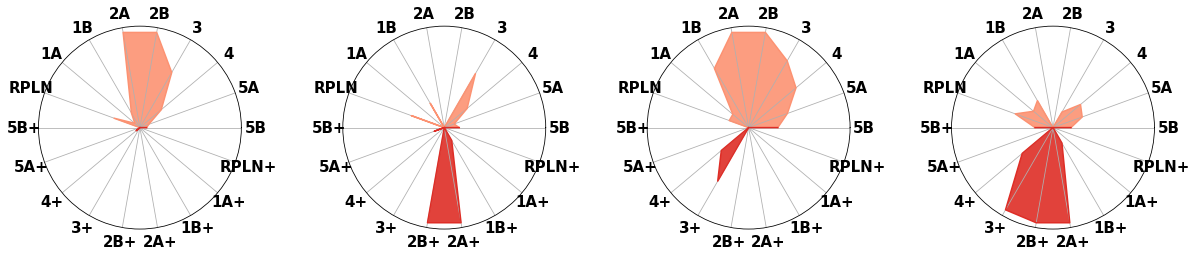

In [32]:
def singlecurve_radar_chart(clusters, 
                            sd,
                            levels = None, 
                            unigram_color = '#fc9272', 
                            bigram_color = '#de2d26', 
                            scale_clusters = False,
                           figname = None):
    if levels is None:
        unigram_levels = ['5B','5A','4','3','2B','2A','1B','1A','RPLN']
    else:
        unigram_levels = levels[:]
    bigram_levels = [n+'+' for n in unigram_levels]
    levels = unigram_levels + bigram_levels
    num_levels = len(levels)
    
    angles = [n / float(num_levels) * 2 * np.pi for n in range(num_levels)]
    angles += [angles[0]]
    diff_clusters = list(np.unique(clusters.values))
    
    fig, axs = plt.subplots(1,len(diff_clusters),
                            subplot_kw = {'polar':True},
                            gridspec_kw = {'wspace': .5},
                            figsize=(20,13))
    ln_data = add_outcomes(clusters,sd).merge(sd.dual_monograms.copy(),on='id')
    for pos, cluster_num in enumerate(diff_clusters):
        cluster_data = ln_data[ln_data['cluster'] == cluster_num]
        nodes = cluster_data.loc[:,unigram_levels]
        unigrams = (nodes == 1).sum()/nodes.shape[0]
        bigrams = (nodes == 2).sum()/nodes.shape[0]
        
        if scale_clusters:
            unigrams = np.sqrt(unigrams)
            bigrams = np.sqrt(bigrams)
        
        temp_unigrams = list(unigrams.values)
        temp_bigrams = list(bigrams.values)
        unigrams = temp_unigrams + [temp_bigrams[0]] 
        bigrams = temp_bigrams + [temp_unigrams[0]]
        
        ax = axs[pos]
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(levels,fontsize='large',size=15,weight='bold',family='sans-serif')
        
        ax.plot(angles[0:len(unigrams)],unigrams, unigram_color)
        ax.fill(angles[0:len(unigrams)],unigrams, unigram_color,alpha = .9)
        
        ax.plot(angles[len(unigrams)-1:],bigrams, bigram_color)
        ax.fill(angles[len(unigrams)-1:],bigrams, bigram_color,alpha=.9)
        

        ax.set_rticks([])
    if figname is not None:
        fig.savefig(figname+'.svg', format='svg')
    return 

singlecurve_radar_chart(finalized_sorted_clusters(sd),
                    sd,
                    scale_clusters = True,
                    figname = 'ln_node_starplots_sqrt_lateral')

In [33]:
class PatternClusterer():
    
    def __init__(self, train_labels, train_patterns, dist_func = None, linkage = 'average'):
        self.labels = train_labels
        self.patterns = train_patterns
        self.pattern_strings = self.to_pattern_strings(train_patterns)
        self.linkage = linkage
        self.means = train_patterns.mean().values
        self.std = train_patterns.std().values
        self.std[np.argwhere(self.std == 0)] = 1

        self.cluster_vectors = {}
        self.cluster_patterns = {}
        self.cluster_variance = {}
        self.dist_func = canberra if dist_func is None else dist_func
        for c, patterns in self.labels.merge(self.patterns,on='id').groupby('cluster'):
            c_patterns = patterns.drop('cluster',axis=1).drop_duplicates().values
            self.cluster_vectors[c] = c_patterns
            self.cluster_variance[c] = self.df_variance(c_patterns)
            c_pattern_strings = self.to_pattern_strings(c_patterns)
            unique_patterns = set([])
            for cp_string in c_pattern_strings:
                unique_patterns.add(cp_string)
            self.cluster_patterns[c] = unique_patterns
            
    def to_pattern_strings(self, x):
        to_string = lambda k: ''.join(list(k.astype('str')))
        if x.ndim < 2:
            return to_string(x)
        x_strings = np.apply_along_axis(to_string, 1, x)
        return x_strings
    
    def check_existing_patterns(self, p_string):
        for c, patterns in self.cluster_patterns.items():
            if p_string in patterns:
                return c
        return None
    
    def df_variance(self, df, mean_vec = None, euclidean = False):
#         print(df.shape, self.means.shape, self.std.shape)
        df = (df - self.means)/self.std
        if mean_vec is None:
            mean_vec = df.mean()
        diff = []
        for i in range(df.shape[0]):
            v = df[i]
            if euclidean:
                dist = (v - mean_vec)**2
            else:
                dist = self.dist_func(v, mean_vec)
            diff.append(dist)
        return np.sum(diff)
    
    def avg_dist(self, vals, x, dist_func = None):
        if dist_func is None:
            dist_func = self.dist_func
        dist = 0
        n_items = vals.shape[0]
        for i in range(n_items):
            dist += dist_func(vals[i],x)
        return dist/n_items
    
    def cluster_linkage(self, c, x):
        vals = self.cluster_vectors[c]
        if self.linkage == 'ward':
            var = self.df_variance(np.vstack([vals,x]))
            var_change = var - self.cluster_variance[c]
            return var_change
        elif self.linkage == 'euclidean_ward':
            var = self.df_variance(np.vstack([vals,x]), euclidean = True)
            var_change = var - self.cluster_variance[c]
            return var_change
        elif self.linkage == 'average':
            dist = self.avg_dist(vals, x)
            return dist
        elif self.linkage == 'euclidean_average':
            dist = self.avg_dist(vals, x, l2)
            return dist
            
    def closest_cluster(self, x):
        min_dist = np.inf
        curr_cluster = 0
        for c, vals in self.cluster_vectors.items():
            dists = []
            
            dist = self.cluster_linkage(c, x)
            if dist <= min_dist:
                min_dist = dist
                curr_cluster = c
                
        return curr_cluster
        
    def match_cluster(self, p_vector):
        if p_vector.sum() == 0:
            return -1
        
        p_string = self.to_pattern_strings(p_vector)
        already_found = self.check_existing_patterns(p_string)
        if already_found is not None:
            return already_found
        cluster = self.closest_cluster(p_vector)
        self.cluster_patterns[cluster].add(p_string)
        return cluster
    

    
def fit_clusters(sd, vd, output_train_labels = True, linkage = 'average'):
    clusters = finalized_sorted_clusters(sd)
    pattern_clusterer = PatternClusterer(clusters, sd.bigrams(), linkage = linkage)
    
    to_fit = vd.bigrams()
    to_fit['cluster'] = 0
    for pid, row in to_fit.drop('cluster',axis=1).iterrows():
        rowvals = np.array(row)
        cluster_label = pattern_clusterer.match_cluster(rowvals)
        to_fit.loc[pid,'cluster'] = cluster_label
    if output_train_labels:
        cdata = clusters.merge(sd.bigrams(),on='id')
        cdata = pd.concat([cdata,to_fit])
        return cdata[~cdata.index.duplicated()]
    return to_fit

def get_all_clusters(linkage='average'):
    all_clusters = pd.concat([fit_clusters(sd, vd,linkage=linkage), fit_clusters(sd,LNDataset(data_root,validation=True),linkage=linkage)])
    all_clusters = all_clusters[~all_clusters.index.duplicated()]
    return all_clusters

pd.get_dummies(get_all_clusters().cluster).sum()

-1     98
 1    800
 2    161
 3     41
 4     59
dtype: int64

In [21]:
get_all_clusters(linkage='euclidean_average')

NameError: name 'get_all_clusters' is not defined

In [34]:
def save_validation_files(save_file = 'validation_clusters', linkages = ['ward','euclidean_ward','average','euclidean_average']):
    save_file += '.csv'
    clusters = get_all_clusters().drop('cluster',axis=1)
    for linkage_option in linkages:
        clusters.insert(0,'cluster_' + linkage_option, get_all_clusters(linkage_option).cluster)
    
    clusters.to_csv(save_file)
    return clusters
save_validation_files()

,cluster_euclidean_average,cluster_average,cluster_euclidean_ward,cluster_ward,1A1B,1A6,1B2A,1B3,2A2B,2A3,...,1A,1B,2A,2B,3,4,5A,5B,6,RPLN
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5064,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5063,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5062,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5059,1,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,2,2,2,2,0.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
10184,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10196,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
def drop_duplicate_indices(df):
    df = df.loc[~df.index.duplicated(keep='first')]
    return df 

test = pd.read_excel('old_ln_patient_data.xlsx', usecols = ['Dummy ID','N-category'])
test = test.set_index('Dummy ID')
test = drop_duplicate_indices(test)
test['N_category_full'] = test['N-category'].apply(lambda x: x if x != 'Nx' else 'N2b')
test = test.drop('N-category',axis=1)
test

,N_category_full
Dummy ID,
2033,N2b
1,N2b
10,N1
100,N2b
10001,N0
...,...
95,N3
96,N2c
97,N1


In [ ]:
ln_data = pd.read_csv('Anonymized_644.Updated_cleaned_v1.3.2.tsv',sep='\t',engine='python').set_index('Dummy ID')
ln_data = ln_data.merge(test,on='Dummy ID')
# ln_data.to_csv('anonymized_644.csv',index=False)

In [ ]:
sd.data.loc[set(ln_data[ln_data['N-category_y'] == 'Nx']['N-category_y'].index).intersection(sd.data.index)]

In [ ]:
ln_data[ln_data['N_category_full'] == 'N2'].loc[:,['Affected Lymph node UPPER','T-category','HPV/P16 status']]

In [ ]:
ln_data[(ln_data['Affected Lymph node UPPER'] == 'L2') & (ln_data['T-category'] == 'T1')].loc[:,['T-category','HPV/P16 status','N-category','N_category_full']].T

In [ ]:
for i,row in sd.data.iterrows():
    ncat = row['N-category']
    if ncat == 'N2':
        if len(row['nodes']) <= 1:
            ncat = 'N2a'
        else:
            nodestring = ''.join(row['nodes'])
            if 'R' in nodestring and 'L' in nodestring:
                ncat = 'N2c'
            else:
                ncat = 'N2c'
        sd.data.loc[i,'N-category'] = ncat
sd.data[sd.data['N-category'] == 'N2']

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')